### Problem 4

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
class ReLU_network():
    def __init__(self, x,y, layerDimensions):
        self.parameters = {} #Creating a Python Dictonary to Hold Weight and Bias Parameters.
        self.L = len(layerDimensions)  #Number of Layers in the Network.
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = np.random.randn(layerDimensions[l], layerDimensions[l-1])
            self.parameters['b' + str(l)] = np.random.randn(layerDimensions[l], 1)
        self.A = {}
        self.Z = {}
        self.y = y
        self.x = x
        self.m = len(x)
        self.Z['Z0'] = x
        self.deltas = {}
        
            
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def dsigmoid(self, z):
        return np.exp(-z)/(np.power((1+np.exp(-z)),2))
    
    def cross_entropy(self, y,a_out):
        return -y*np.log(a_out)-(1-y)*np.log(1-a_out)
    
    def Feedforward(self, x):
        self.A['A0'] = x
        for l in range(1, self.L):
            self.Z['Z' + str(l)] = np.dot(self.A['A' + str(l-1)], self.parameters['W' + str(l)].T ) + self.parameters['b' + str(l)].T
            self.A['A' + str(l)] = self.sigmoid(self.Z['Z' + str(l)])   
        return self.A['A' + str(self.L - 1)]
        
    def costFunction(self):
        self.A['A0'] = self.x
        self.A['A'+ str(self.L-1)] = self.Feedforward(self.x)
        cost = 0
        for i in range(self.m):
            cost = cost + self.cross_entropy(self.y[i], self.A['A'+str(self.L-1)][i])
        return cost
    
    
    def deltaCost(self):
        L = self.L
        
        self.A['A'+ str(L-1)] = self.Feedforward(self.x)
        self.deltas['delta' + str(L-1)] = np.multiply(-(self.y - self.A['A'+ str(self.L-1)]), self.dsigmoid(self.Z['Z'+ str(self.L-1)]))
        
        for l in range(L-1, 0, -1):
            self.deltas['dW' + str(l)] = np.dot(self.A['A' + str(l-1)].T, self.deltas["delta" + str(l)])
            self.deltas['db' + str(l)] = np.sum(self.deltas["delta" + str(l)])
            
            self.deltas["delta" + str(l-1)] = np.multiply(np.dot(self.deltas["delta" + str(l)], self.parameters['W' + str(l)] ), self.dsigmoid(self.Z['Z' + str(l-1)]))
        return self.deltas
    
    def UpdateParameters(self):
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = self.parameters['W' + str(l)] - (alpha * self.deltas['dW' + str(l)]).T
            self.parameters['b' + str(l)] = self.parameters['b' + str(l)] - (alpha * self.deltas['db' + str(l)]).T
            
    def getFinalParam(self):
        W = self.parameters['W'+str(self.L-1)]
        b = self.parameters['b'+str(self.L-1)]
        return W,b
    
        

               

In [28]:
# For 5 hidden Layers:

In [29]:
def GenerateTestData(Size):
    d = 1  # dimension 
    m = 20 # number of training samples 
    c = 2 # parameter controlling seperation between the clusters
    sigma1 = 1.5 #Sigma^2_1
    sigma2 = sigma1 #Sigma^2_2
    m1 = c*np.array([1]) #Mu_1
    m2 = -m1 #Mu_2 

    x1 = np.random.multivariate_normal(m1,sigma1*np.identity(d),int(m/2)) 
    x2 = np.random.multivariate_normal(m2,sigma2*np.identity(d),int(m/2)) 
    x = np.concatenate((x1,x2),axis=0)

    y1 = np.ones((int(m/2),1))
    y2 = np.ones((int(m/2),1))
    y = np.concatenate((y1,y2),axis=0)
    plot(x1[:,0], '.')
    plot(x2[:,0], '.')
    title("Gaussian Clusters")
    legend(["x1", "x2"])
    return x,y, x1,x2

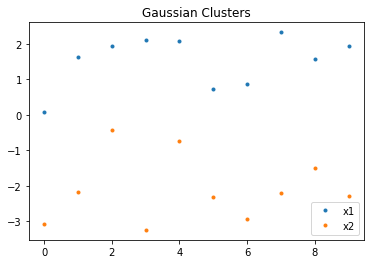

In [30]:
x,y,x1,x2 = GenerateTestData(30)


In [31]:
NN = ReLU_network(x, y, [1,3,2,5,1])

"""
This means 5 input parameters. 4 Neurons in the first (Hidden) layer, and 3 Neurons in second (Output) layer.
"""


'\nThis means 5 input parameters. 4 Neurons in the first (Hidden) layer, and 3 Neurons in second (Output) layer.\n'

In [32]:
# This is how you access dictionary parameters:
# NN.parameters[W1]

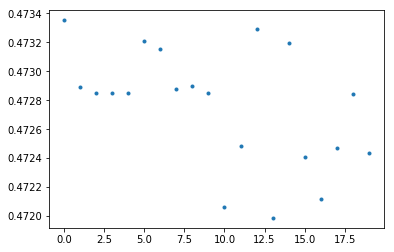

In [33]:

Output = NN.Feedforward(x)
plot(Output, '.')

In [34]:
cost = NN.costFunction()
cost

array([14.98360084])

In [35]:
delta = NN.deltaCost()

Final Cost = 1.5850866243839665


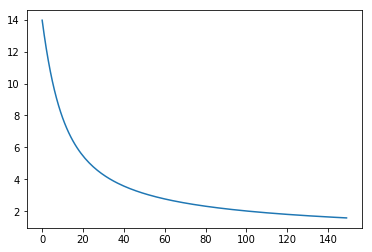

In [36]:
NumOfIterations = 150
alpha = 0.01
CostTracker = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas = NN.deltaCost()
    NN.UpdateParameters()
    Output_New = NN.Feedforward(x)
    CostTracker[i] = NN.costFunction()
w, b = NN.getFinalParam()
plot(CostTracker)
print("Final Cost = " + str(CostTracker[NumOfIterations-1]))

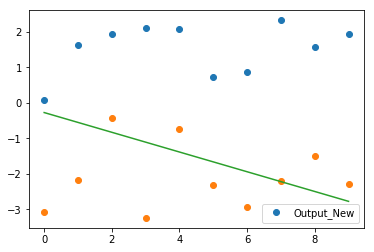

In [37]:
# plot(Output_New)
plt.plot(x1[:,0],'o')
plt.plot(x2[:,0],'o')
# plot(x, 'o')

p = np.linspace(1,10,10).reshape(-1,1)
y = w[0]*p + (b/30)
plot(y[:,0])
legend(['Output_New'])